Introduction

In this project, we will examine the data and build different machine learning models that will predict the survival or the death of a given passenger based on a set of variables describing such as age, sex, or passenger class on the ship. using different classifiers.

Dataset

The dataset used in this project is titanic.csv that contains 891 instances  with 12 features like PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked



In [425]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [426]:
df=pd.read_csv("titanic.csv")

In [427]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [428]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [429]:
pd.set_option('display.max_rows',None)

In [430]:
df.shape

(891, 12)

In [431]:
df.dtypes #Checking data type

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The given dataset type is Integers,Object and float

In [432]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is 177 null values in Age column, 687 in Cabin and 2 in Embarked

In [433]:
df["Age"]=df["Age"].fillna(np.mean(df["Age"]))


In [434]:
df["Embarked"] = df["Embarked"].fillna('median')


In [435]:
df["Cabin"] = df["Cabin"].fillna('median')


In [436]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [437]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Statistics Summery

In [439]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


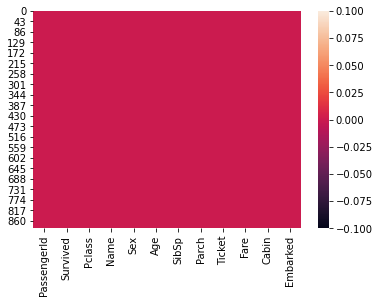

In [485]:
sns.heatmap(df.isnull())

as per the heatmap there is no null value in given data set

In [441]:
dfcor=df.corr()#  Checking correlation
dfcor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


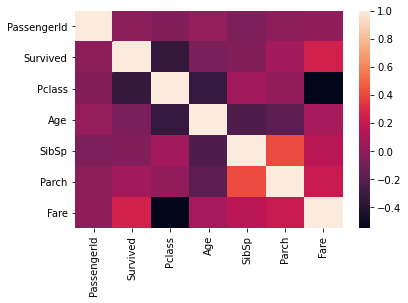

In [442]:
sns.heatmap(dfcor)

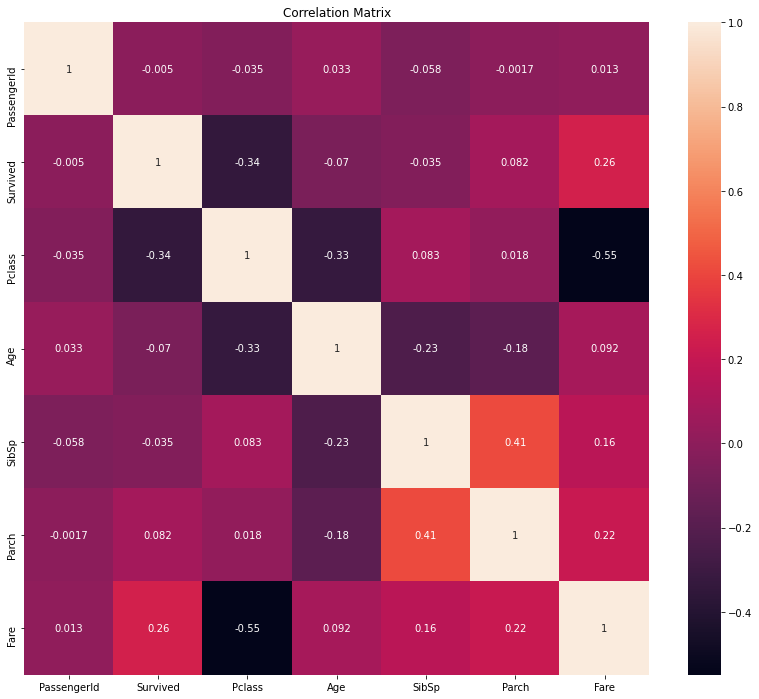

In [443]:
plt.figure(figsize=(14,12))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

As per given set Fare is highly correlated with survived than other columns

In [444]:
corr_matrix=df.corr()

In [445]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64

In [446]:
# spliting the independent and target variables in x and y
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [447]:
# see that the target feature is discrete
print(set(df['Survived']))

{0, 1}


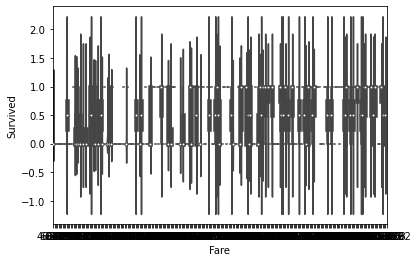

In [448]:
sns.violinplot(x="Fare",y="Survived",data=df)

passenger who paid higher fares survied more than who paid cheaper fares

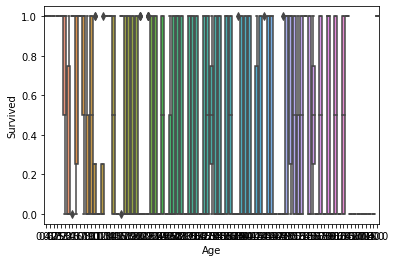

In [449]:
sns.boxplot(x="Age",y="Survived",data=df)

Younger people survived more than the elder one

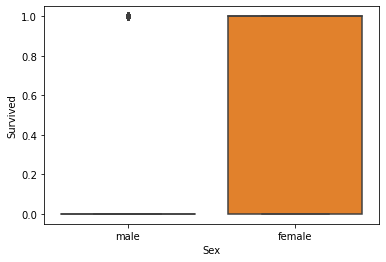

In [450]:
sns.boxplot(x="Sex",y="Survived",data=df)


As per the graph Women survived more than men.

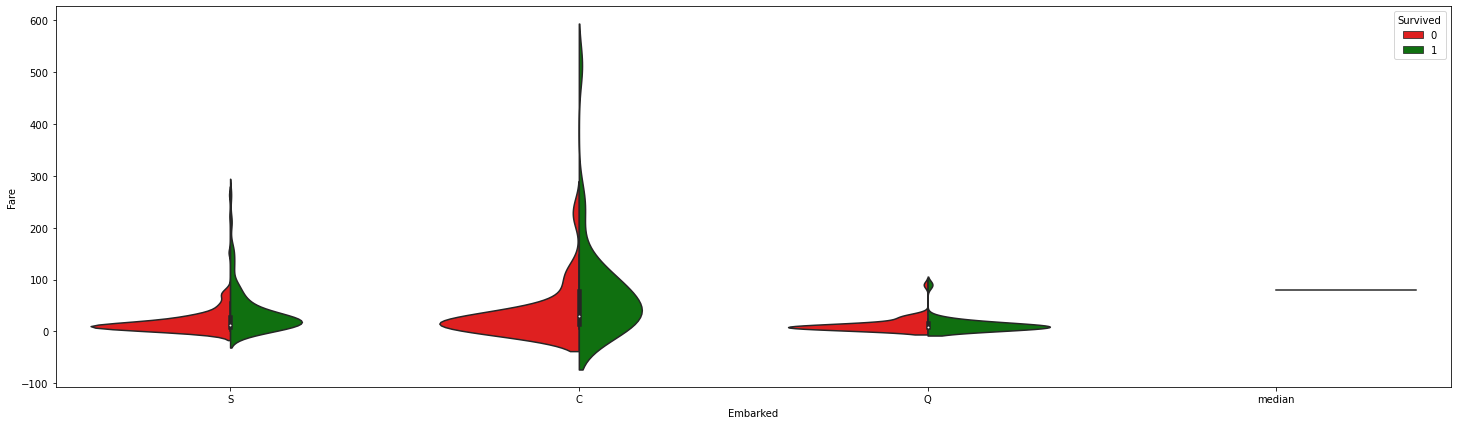

In [451]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=df, split=True, palette={0: "r", 1: "g"});


embark C has a wider range of fare tickets and therefore the passengers who paid the highest prices were survived more then the cheaper one

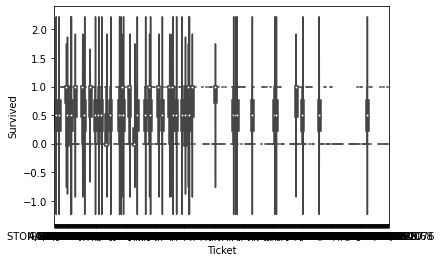

In [452]:
sns.violinplot(x="Ticket",y="Survived",data=df)


Passengers with cheaper ticket fares died more than higher ticket fares

In [453]:
from sklearn.preprocessing import LabelEncoder #Converting catagorical data into numerical
LE=LabelEncoder()
df["Sex"]=LE.fit_transform(df["Sex"])
df["Name"]=LE.fit_transform(df["Name"])
df["Ticket"]=LE.fit_transform(df["Ticket"])
df["Cabin"]=LE.fit_transform(df["Cabin"])
df["Embarked"]=LE.fit_transform(df["Embarked"])




In [454]:
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  Name  Sex        Age  SibSp  Parch  \
0              1         0       3   108    1  22.000000      1      0   
1              2         1       1   190    0  38.000000      1      0   
2              3         1       3   353    0  26.000000      0      0   
3              4         1       1   272    0  35.000000      1      0   
4              5         0       3    15    1  35.000000      0      0   
5              6         0       3   554    1  29.699118      0      0   
6              7         0       1   515    1  54.000000      0      0   
7              8         0       3   624    1   2.000000      3      1   
8              9         1       3   412    0  27.000000      0      2   
9             10         1       2   576    0  14.000000      1      0   
10            11         1       3   727    0   4.000000      1      1   
11            12         1       1    95    0  58.000000      0      0   
12      

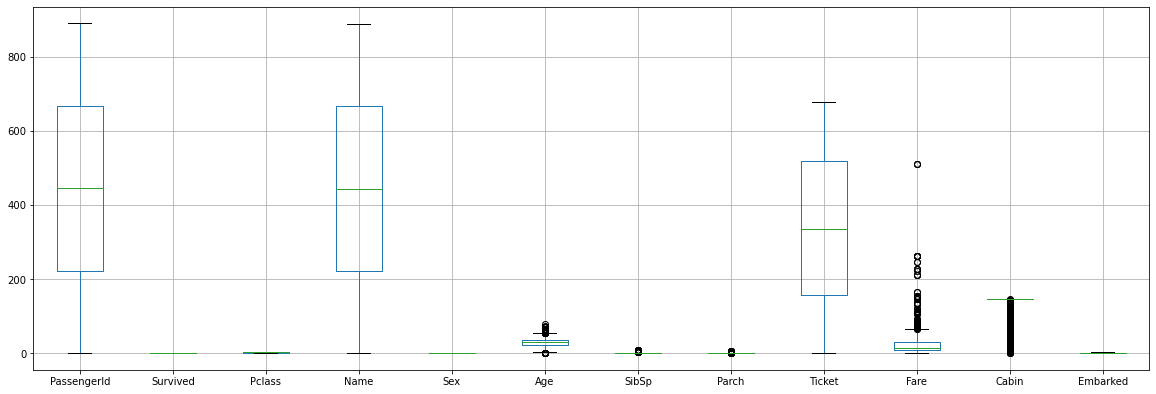

In [455]:
#Plotting boxplots to check outliers
df.iloc[:,0:23].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

We will not remove outliers as the data loss percentage is on very higher side(<10)

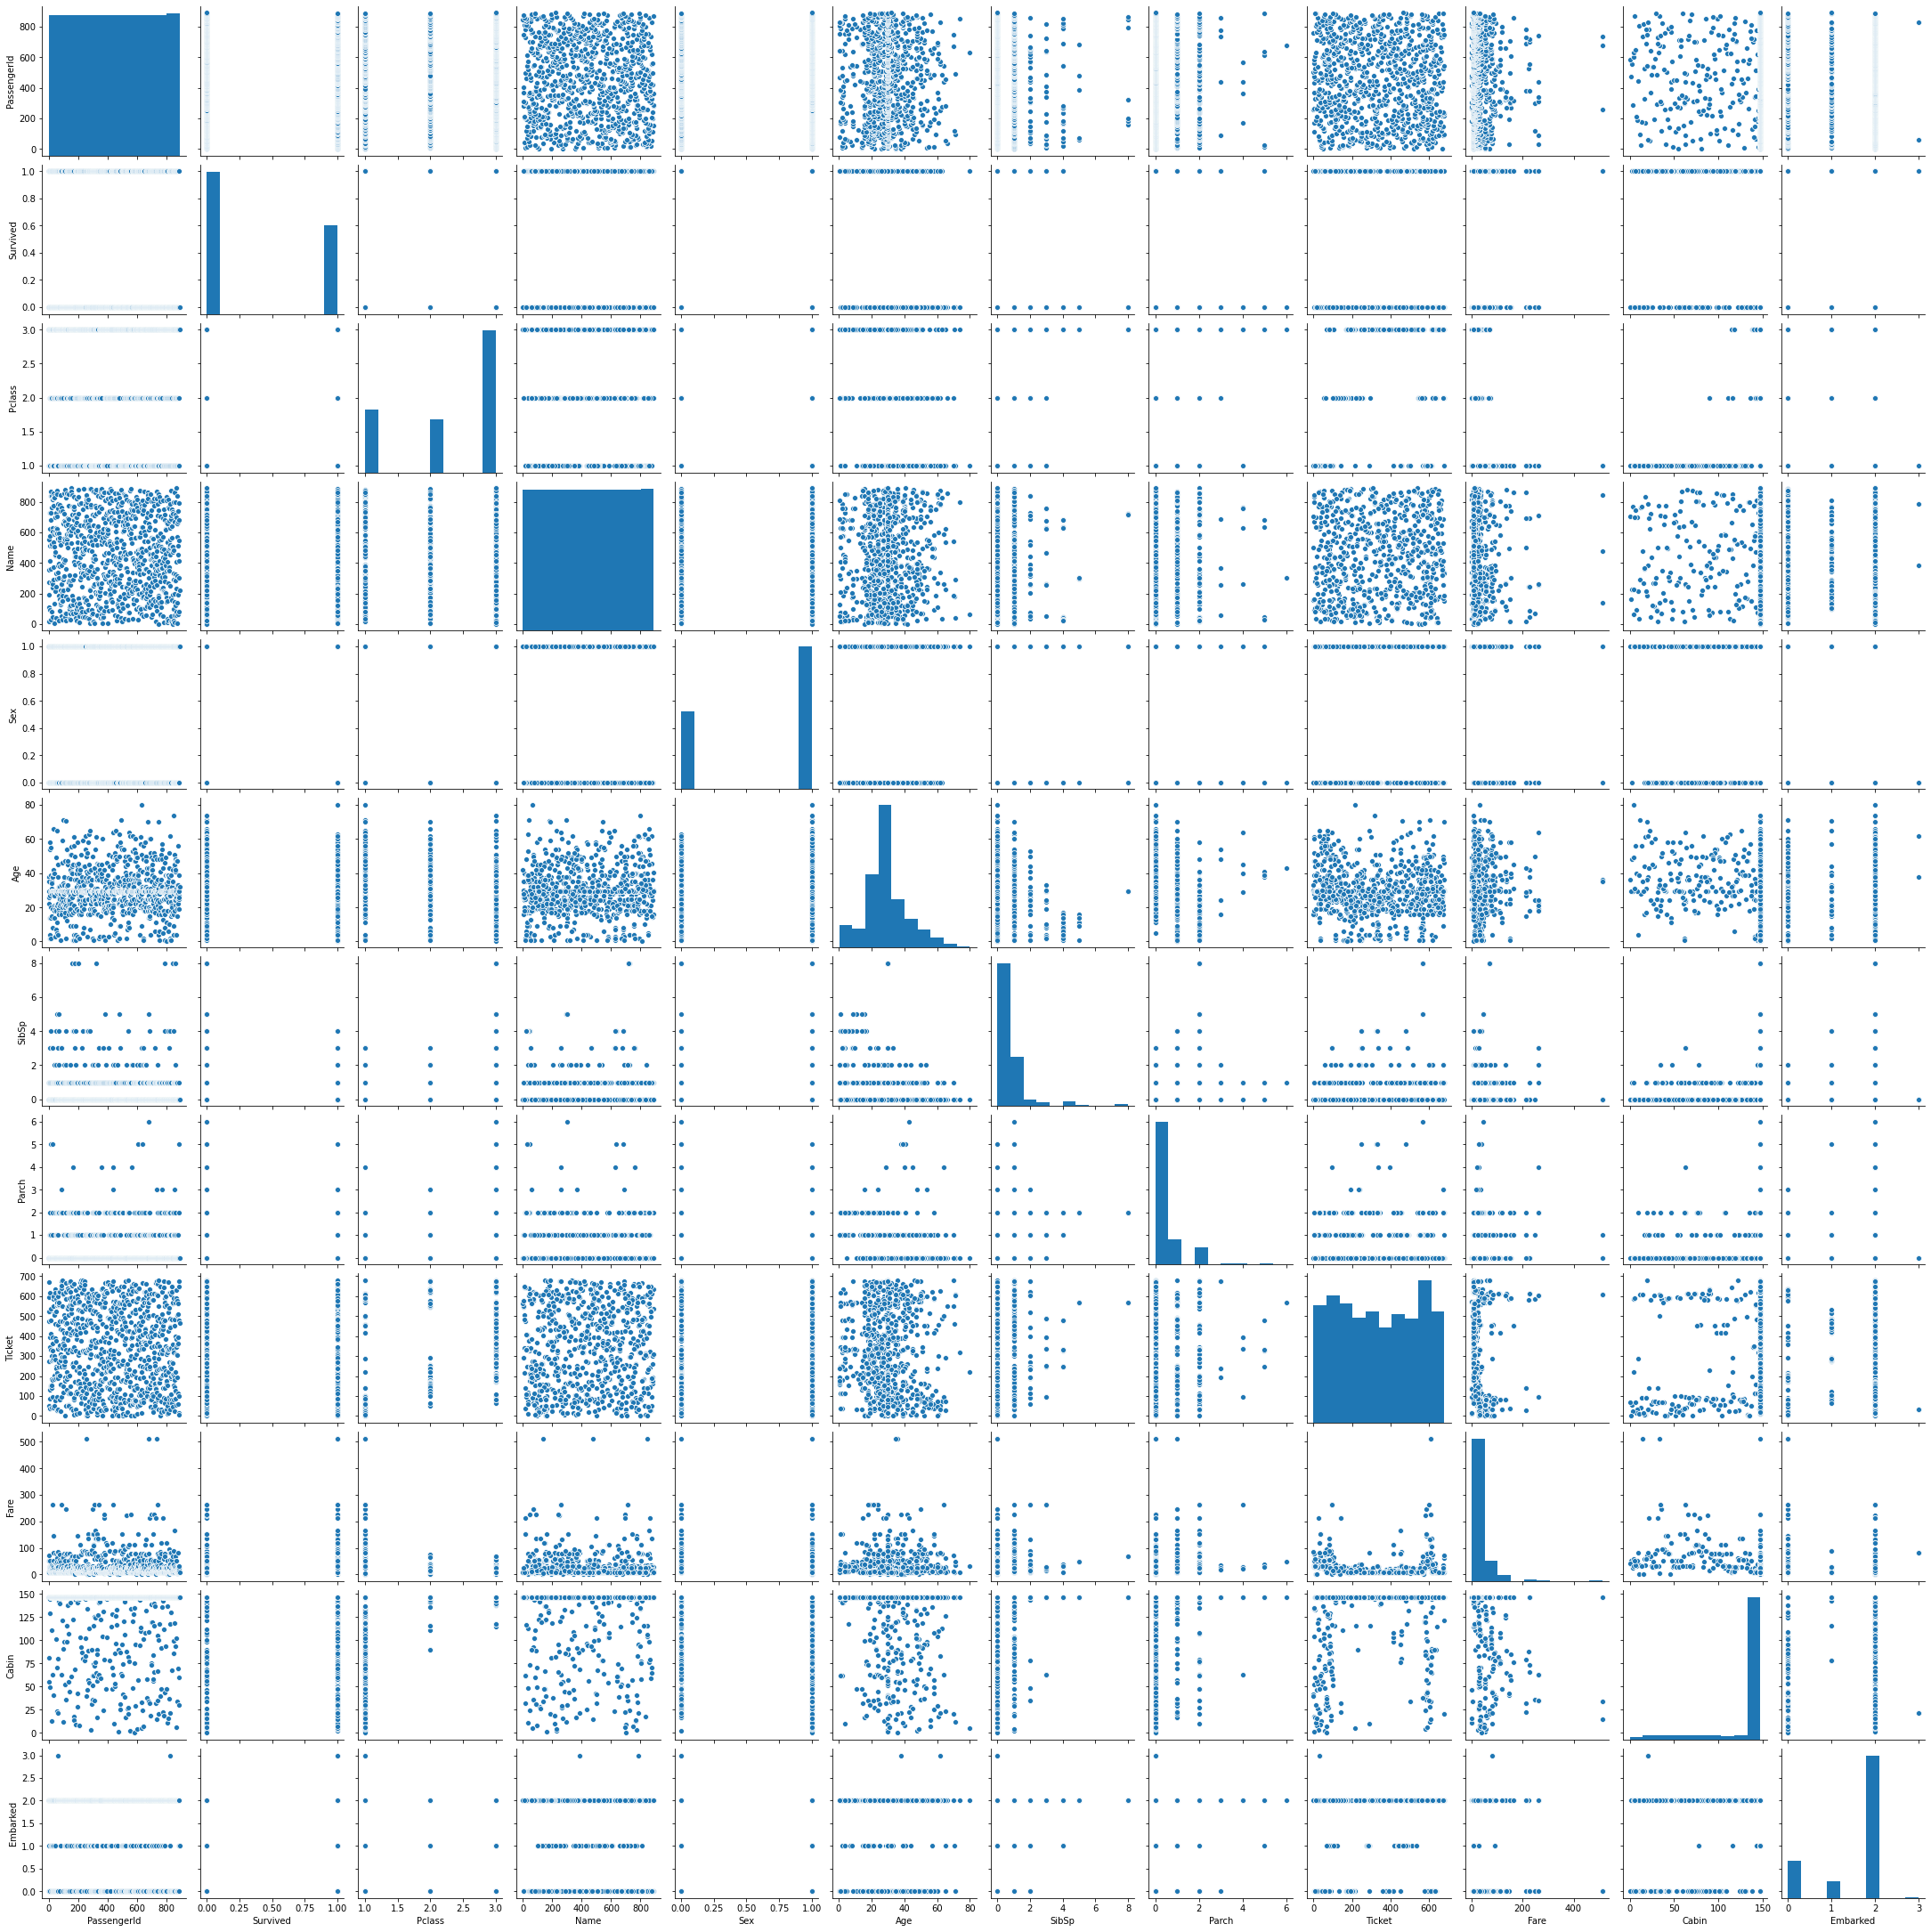

In [456]:
sns.pairplot(df)
plt.show()

In [457]:
# spliting the independent and target variables in x and y
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [458]:
x.skew() #checking skewness

PassengerId    0.000000
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin         -2.167313
Embarked      -1.246689
dtype: float64

In [459]:
from sklearn.preprocessing import power_transform   #removing skewness
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [460]:
df_new.skew()

PassengerId   -0.283201
Pclass        -0.441438
Name          -0.288132
Sex           -0.618921
Age            0.064420
SibSp          0.808608
Parch          1.228795
Ticket        -0.299695
Fare          -0.040329
Cabin         -1.602847
Embarked      -0.861651
dtype: float64

In [461]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.000000,1,0,523,7.2500,147,2
1,2,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,3,353,0,26.000000,0,0,669,7.9250,147,2
3,4,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,3,15,1,35.000000,0,0,472,8.0500,147,2
5,6,3,554,1,29.699118,0,0,275,8.4583,147,1
6,7,1,515,1,54.000000,0,0,85,51.8625,129,2
7,8,3,624,1,2.000000,3,1,395,21.0750,147,2
8,9,3,412,0,27.000000,0,2,344,11.1333,147,2
9,10,2,576,0,14.000000,1,0,132,30.0708,147,0


Creating train-test split

In [462]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.73010796,  0.82737724, -1.31021659, ..., -0.50244517,
         0.45150219,  0.58111394],
       [-1.72622007, -1.56610693, -0.99141018, ...,  0.78684529,
        -1.38162664, -1.93846038],
       [-1.72233219,  0.82737724, -0.35768524, ..., -0.48885426,
         0.45150219,  0.58111394],
       ...,
       [ 1.72233219,  0.82737724, -0.12441226, ..., -0.17626324,
         0.45150219,  0.58111394],
       [ 1.72622007, -1.56610693, -1.41518943, ..., -0.04438104,
        -1.9648949 , -1.93846038],
       [ 1.73010796,  0.82737724, -0.87477369, ..., -0.49237783,
         0.45150219, -0.67867322]])

In [463]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu,"on Random_state",maxRS)


best accuracy is  0.9333333333333333 on Random_state 18


In [464]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=18)

In [465]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    

0.9333333333333333
[[17  2]
 [ 0 11]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.93        30
weighted avg       0.94      0.93      0.93        30



In [466]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
predlr=dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8
[[14  5]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.67      0.91      0.77        11

    accuracy                           0.80        30
   macro avg       0.80      0.82      0.80        30
weighted avg       0.84      0.80      0.80        30



In [467]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
predlr=svc.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8666666666666667
[[17  2]
 [ 2  9]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



In [468]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predlr=rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9
[[17  2]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



In [469]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR, x,y,cv=5)
print("Cross validation of LogisticRegression model:",scr.mean())

Cross validation of LogisticRegression model: 0.784514468646036


In [470]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x,y,cv=5)
print("Cross validation of DecisionTree model:",scr.mean())

Cross validation of DecisionTree model: 0.7397777917268219


In [471]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x,y,cv=5)
print("Cross validation of SVC model:",scr.mean())

Cross validation of SVC model: 0.813684012303057


In [472]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x,y,cv=5)
print("Cross validation of RandomForest model:",scr.mean())

Cross validation of RandomForest model: 0.8406691356474798


Minimum difference in accuracy and cross validation score is for DecisionTreeClassifier so this is our best model

Hyper parameter tuning

In [473]:
from sklearn.model_selection import GridSearchCV

In [474]:
#Creating parameter list to pass in GridSearch

parameters={'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [475]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [476]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [477]:
GCV.best_params_ #Printing the best parameter found by GridSearch

{'criterion': 'entropy', 'max_depth': 4}

In [478]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [479]:
accuracy_score(y_test,GCV_pred)

0.9

In [480]:
#Saving model

import joblib
joblib.dump(dt,"Titanic.obj")

['Titanic.obj']

In [481]:
p=joblib.load("Titanic.obj")

In [484]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dt.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,1
6,1,1
7,0,1
8,1,1
9,1,1
